# RSSI Data Analysis

In [1]:
import json
from collections import defaultdict
import datetime as dt
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [5]:
def load_data(file_paths):
    all_data = []
    for path in file_paths:
        df = pd.read_csv(path)
    return df
    
file_paths = ['rssi_data_PB.csv', 'rssi_data_stbkscc.csv', 'rssi_data_ccl.csv', 'rssi_data_roastd.csv'] 
df = load_data(file_paths)
print(df.head())

             timestamp         ssid               bssid  rssi  crowd_count
0  2024-11-09 11:11:36    Roastd-JC  38:3f:b3:45:d8:a0:   -49           20
1  2024-11-09 11:11:36  newportwifi  82:8a:20:25:91:ec:   -92           20
2  2024-11-09 11:11:36  newportwifi  82:8a:20:25:94:12:   -72           20
3  2024-11-09 11:11:36  newportwifi  7e:8a:20:24:91:ec:   -68           20
4  2024-11-09 11:11:36  newportwifi  7e:8a:20:24:94:12:   -59           20


In [7]:
def load_data(file_paths, locations):
    all_data = []
    for path, location in zip(file_paths, locations):  
        df = pd.read_csv(path)
        df['Location'] = location  
        all_data.append(df)
    return pd.concat(all_data, ignore_index=True) 

file_paths = [
    'rssi_data_PB.csv', 
    'rssi_data_stbkscc.csv', 
    'rssi_data_ccl.csv', 
    'rssi_data_roastd.csv'
]
locations = ['I', 'II', 'III', 'IV'] 

df_loc = load_data(file_paths, locations)
print(df_loc.head())

             timestamp                  ssid               bssid  rssi  \
0  2024-10-14 18:47:13  Paris Baguette Guest  ac:71:2e:cb:57:18:   -54   
1  2024-10-14 18:47:13  Paris Baguette Guest  ac:71:2e:cb:57:18:   -54   
2  2024-10-14 18:47:14  Paris Baguette Guest  ac:71:2e:ca:62:10:   -64   
3  2024-10-14 18:47:14  Paris Baguette Guest  ac:71:2e:cb:57:18:   -52   
4  2024-10-14 18:47:14  Paris Baguette Guest  ac:71:2e:cb:57:10:   -42   

   crowd_count Location  
0            6        I  
1            6        I  
2            6        I  
3            6        I  
4            6        I  


In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['crowd_count'] = pd.to_numeric(df['crowd_count'])
print("Basic Data Info:")
print(df.info())

Basic Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255521 entries, 0 to 255520
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   timestamp    255521 non-null  datetime64[ns]
 1   ssid         180401 non-null  object        
 2   bssid        255521 non-null  object        
 3   rssi         255521 non-null  int64         
 4   crowd_count  255521 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.7+ MB
None


In [11]:
# Calculate correlations
correlation = df[['rssi', 'crowd_count']].corr()
print("Correlation between RSSI and Crowd Count:")
print(correlation)

Correlation between RSSI and Crowd Count:
                 rssi  crowd_count
rssi         1.000000    -0.011243
crowd_count -0.011243     1.000000


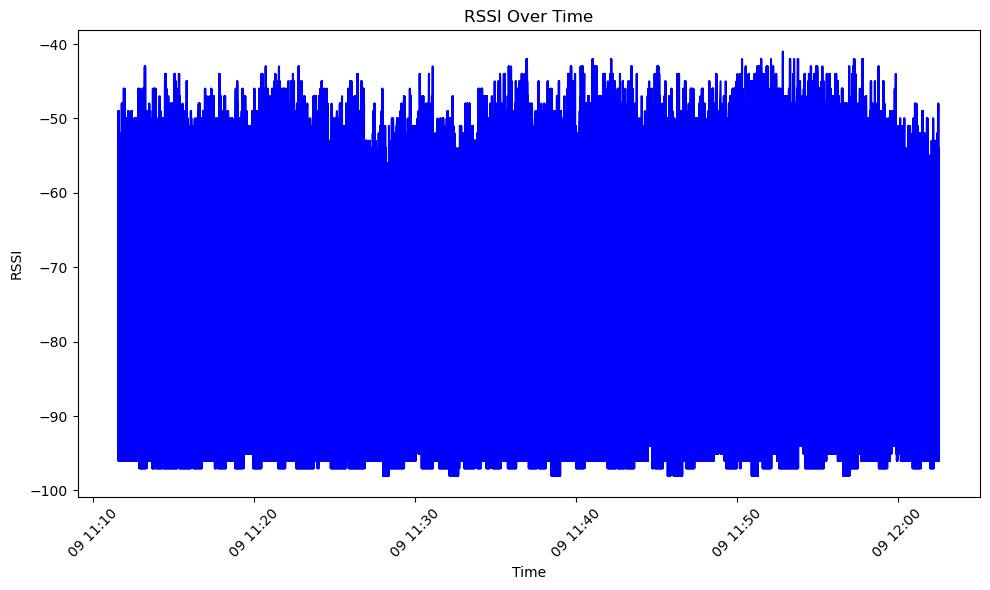

In [13]:
# Visualization: RSSI over time
plt.figure(figsize=(10,6))
plt.plot(df['timestamp'], df['rssi'], label="RSSI", color="blue")
plt.xlabel("Time")
plt.ylabel("RSSI")
plt.title("RSSI Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot shows fluctuating RSSI values between -20 dBm to -100 dBm over time, with most values ranging between -30 and -70 dBm. A notable dip around 18:17:40 indicates a potential signal disruption or environmental change. This pattern suggests possible crowd movement or interference affecting Wi-Fi signal strength.

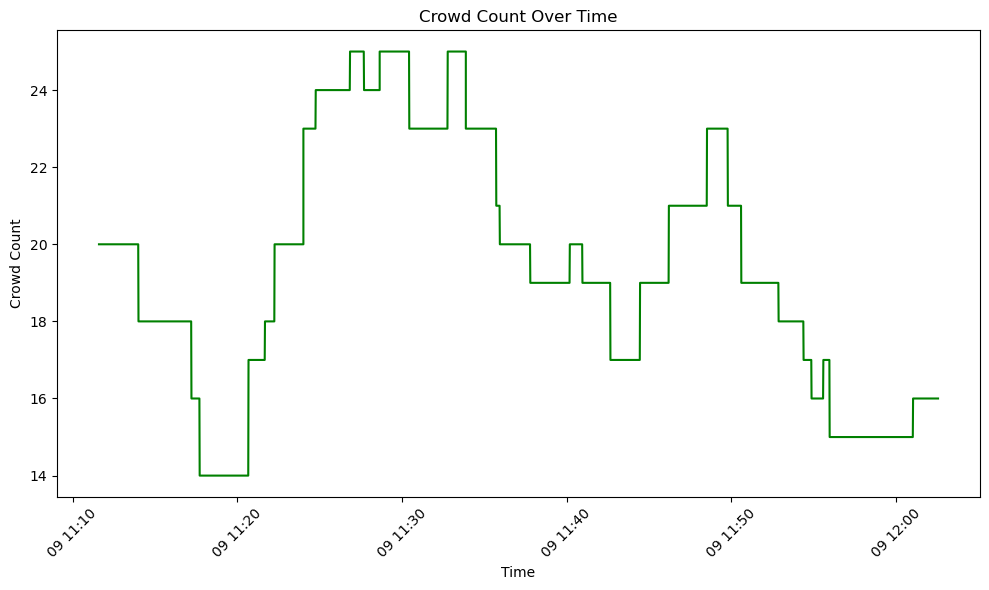

In [16]:
# Visualization: Crowd count over time
plt.figure(figsize=(10,6))
plt.plot(df['timestamp'], df['crowd_count'], label="Crowd Count", color="green")
plt.xlabel("Time")
plt.ylabel("Crowd Count")
plt.title("Crowd Count Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\pinal\AppData\Local\Temp\ipykernel_30516\151749918.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\pinal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


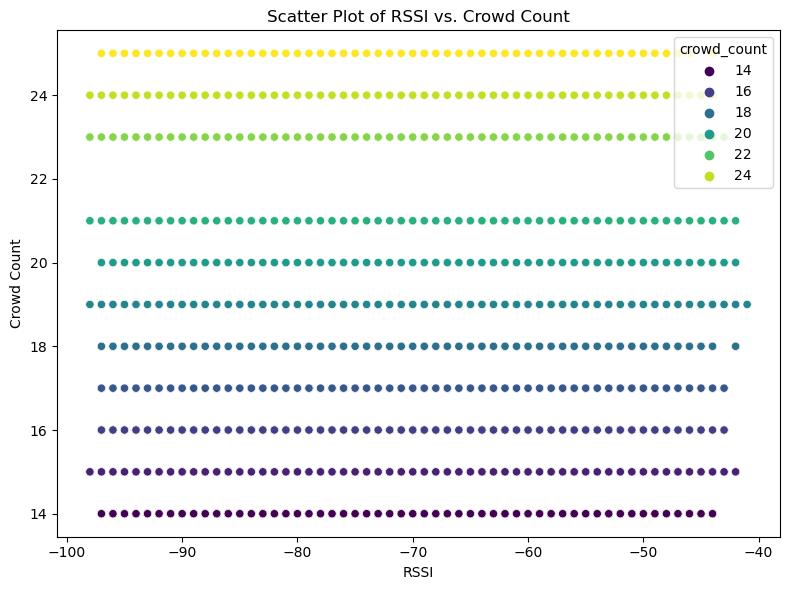

In [18]:
# Visualization: RSSI vs. Crowd Count
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['rssi'], y=df['crowd_count'], hue=df['crowd_count'], palette='viridis')
plt.xlabel("RSSI")
plt.ylabel("Crowd Count")
plt.title("Scatter Plot of RSSI vs. Crowd Count")
plt.tight_layout()
plt.show()

For lower crowd counts (e.g., 4, 5), RSSI values are distributed across a wider range, from approximately -100 to -20.
As the crowd count increases (e.g., 7, 8), RSSI values still span a wide range but are less concentrated at the lower RSSI values.
Trend: There does not appear to be a strong linear correlation between RSSI and crowd count in this plot, as the RSSI values do not consistently increase or decrease with the crowd size.
Possible Interpretation:
RSSI seems to vary within each crowd count without a clear direct relationship to crowd size.

C:\Users\pinal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pinal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pinal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pinal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

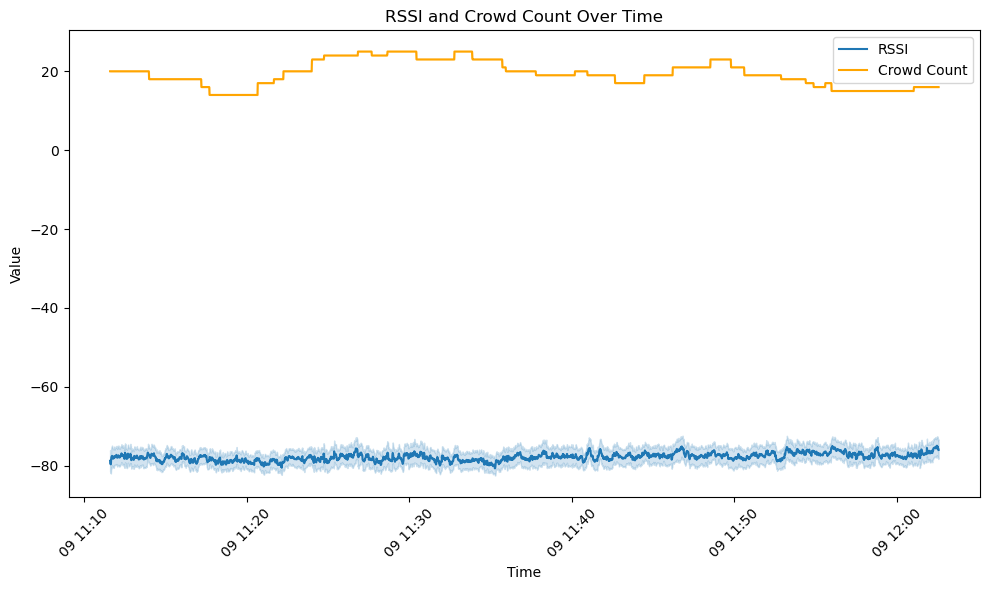

In [20]:
# Analysis of crowd count behavior and RSSI patterns
plt.figure(figsize=(10,6))
sns.lineplot(x='timestamp', y='rssi', data=df, label="RSSI")
sns.lineplot(x='timestamp', y='crowd_count', data=df, label="Crowd Count", color="orange")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("RSSI and Crowd Count Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

RSSI Fluctuations: The RSSI signal strength fluctuates consistently between -60 and -80 dBm, with minor variations but no major trend across the time period.
Stable Crowd Count: The crowd count remains mostly constant around a high value, showing only minor increases over time.
Disconnection: The crowd count changes don't appear to influence the RSSI, as the RSSI remains relatively stable despite the changes in crowd size.

C:\Users\pinal\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


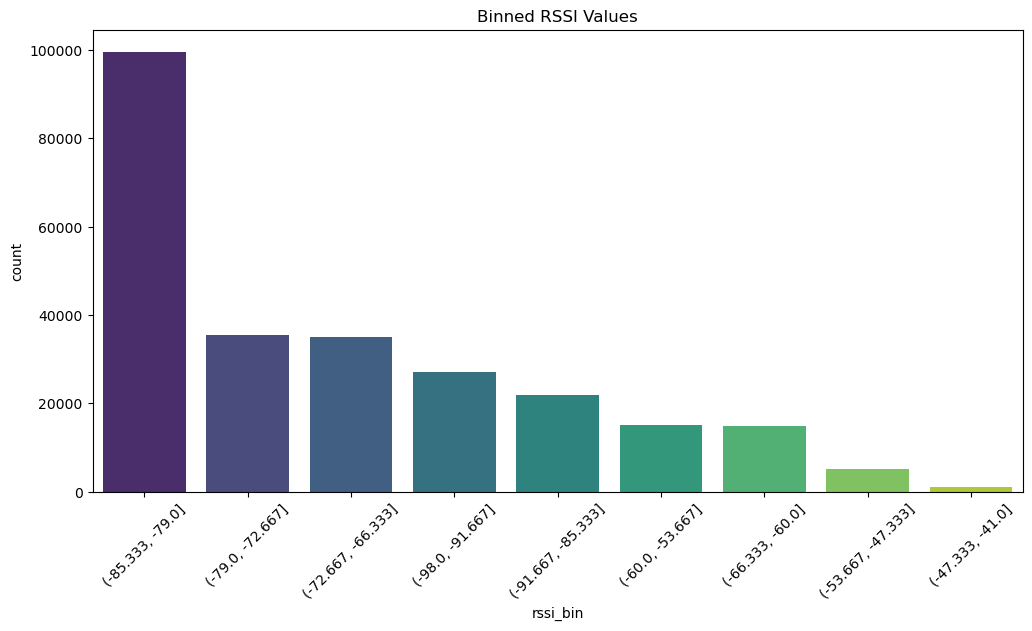

In [22]:
df['rssi_bin'] = pd.cut(df['rssi'], bins=np.linspace(df['rssi'].min(), df['rssi'].max(), 10))

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='rssi_bin', data=df, palette='viridis', order=df['rssi_bin'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Binned RSSI Values')
plt.show()

The binned RSSI values show a clear right-skewed distribution, indicating that most RSSI values are concentrated in the lower range. The bin with the highest count is (-89.778, -80.556], suggesting that a large number of measurements fall within this range. The distribution gradually decreases as the RSSI values increase, indicating fewer measurements in higher ranges.

## Analysing BSSID

In [25]:
bssid_group = df.groupby('bssid').agg({'rssi': ['mean', 'std'], 'crowd_count': ['mean', 'std']})
print(bssid_group)

                         rssi           crowd_count          
                         mean       std        mean       std
bssid                                                        
02:24:a5:16:9a:73: -76.000000  0.000000   25.000000  0.000000
02:49:a5:16:9a:73: -91.500000  0.503831   24.000000  1.007663
02:ba:7d:10:51:92: -83.634615  1.854188   19.365385  1.672494
02:dc:e4:46:65:db: -54.780349  5.014636   19.951092  3.231732
04:09:86:fe:ae:c1: -81.913462  2.453888   21.115385  2.100891
...                       ...       ...         ...       ...
ee:cb:ac:91:f8:a1: -73.000000  0.000000   16.000000  0.000000
f8:28:19:f2:7e:ad: -87.609293  2.534185   19.390052  3.202447
fa:8f:ca:55:6a:ac: -80.184829  1.757027   18.888889  3.091590
fc:34:97:38:8a:98: -78.157615  1.852214   19.165970  3.039286
fc:34:97:38:8a:9a: -77.935730  1.668558   18.753258  3.088003

[218 rows x 4 columns]


C:\Users\pinal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


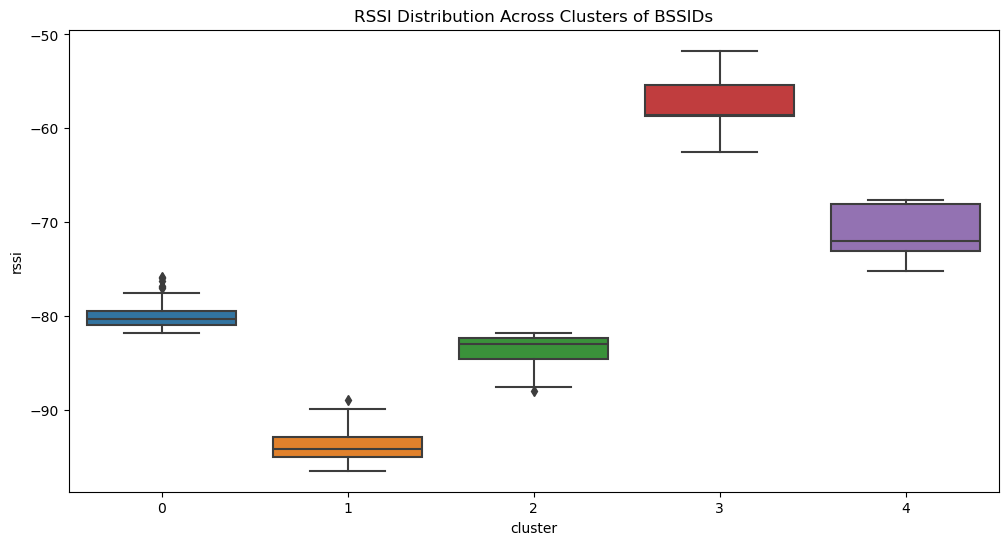

In [26]:
# Group by BSSID and calculate the mean RSSI
bssid_mean = df.groupby('bssid')['rssi'].mean().reset_index()

# Apply K-means clustering to categorize BSSIDs based on mean RSSI
kmeans = KMeans(n_clusters=5)
bssid_mean['cluster'] = kmeans.fit_predict(bssid_mean[['rssi']])

# Plot RSSI distribution for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='rssi', data=bssid_mean)
plt.title('RSSI Distribution Across Clusters of BSSIDs')
plt.show()

The interquartile ranges (IQRs) vary across clusters, indicating different levels of variability in RSSI values within each cluster. Cluster 3 has the smallest IQR, suggesting a more concentrated distribution of RSSI values, while cluster 1 has the largest IQR, indicating a wider spread of RSSI values. There are also outliers present in clusters 0, 1, and 3, indicating extreme values that deviate significantly from the main distribution.

In [36]:
def eda_summary(data):
    summary = data.groupby('Location')['rssi'].agg(
        Count='count',
        Mean='mean',
        Std_Dev='std',
        Min='min',
        Max='max'
    ).reset_index()
    
    summary['Min-Max'] = summary.apply(lambda row: f"{row['Min']} to {row['Max']}", axis=1)
    summary.drop(columns=['Min', 'Max'], inplace=True)  # Drop Min and Max columns if not needed
    return summary

eda_results = eda_summary(df_loc)

print(eda_results)

  Location   Count       Mean    Std_Dev     Min-Max
0        I  183712 -65.933608  14.651985  -93 to -31
1       II  142556 -76.932721  13.043569  -93 to -41
2      III  185885 -73.896565  14.254766  -99 to -16
3       IV  255521 -77.818359  10.557801  -98 to -41


### Plotting RSSI values over time for the top N SSIDs by average RSSI

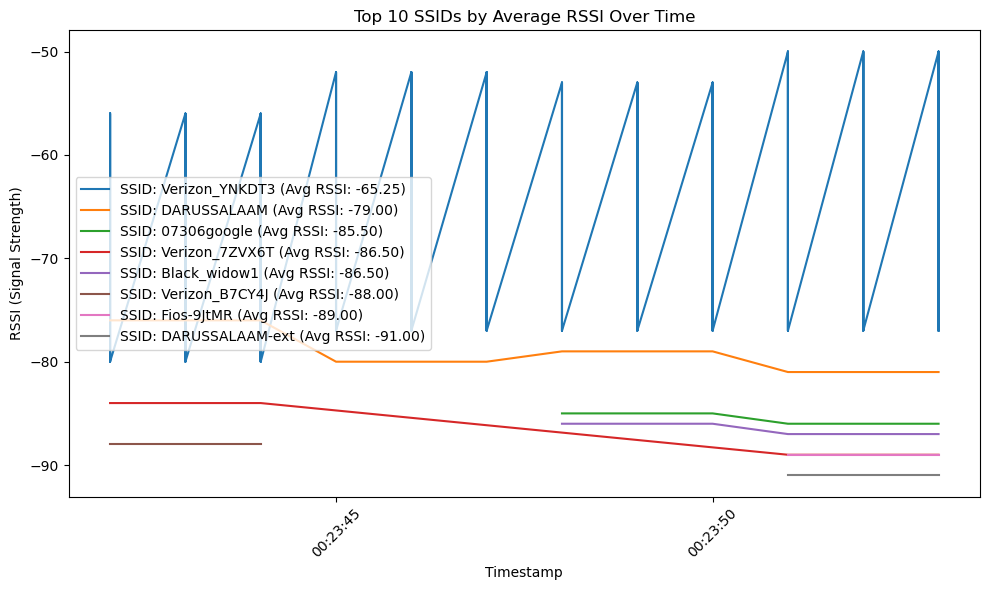

In [39]:
def plot_top_n_rssi_over_time(ssid_count, ssid_averages, top_n=10):
    # Sort SSIDs by average RSSI
    top_n_ssids = sorted(ssid_averages, key=ssid_averages.get, reverse=True)[:top_n]

    # Plot RSSI values over time for top N SSIDs
    plt.figure(figsize=(10, 6))
    
    for ssid in top_n_ssids:
        rssi_data = ssid_count[ssid]
        timestamps = [dt.datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t, _ in rssi_data]
        rssi_values = [rssi for _, rssi in rssi_data]
        
        plt.plot(timestamps, rssi_values, label=f"SSID: {ssid} (Avg RSSI: {ssid_averages[ssid]:.2f})")
    
    plt.xlabel('Timestamp')
    plt.ylabel('RSSI (Signal Strength)')
    plt.title(f'Top {top_n} SSIDs by Average RSSI Over Time')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot RSSI signal strength over time for the top 10 SSIDs
plot_top_n_rssi_over_time(ssid_count, ssid_averages, top_n=10)


### Plotting subplots for each SSID

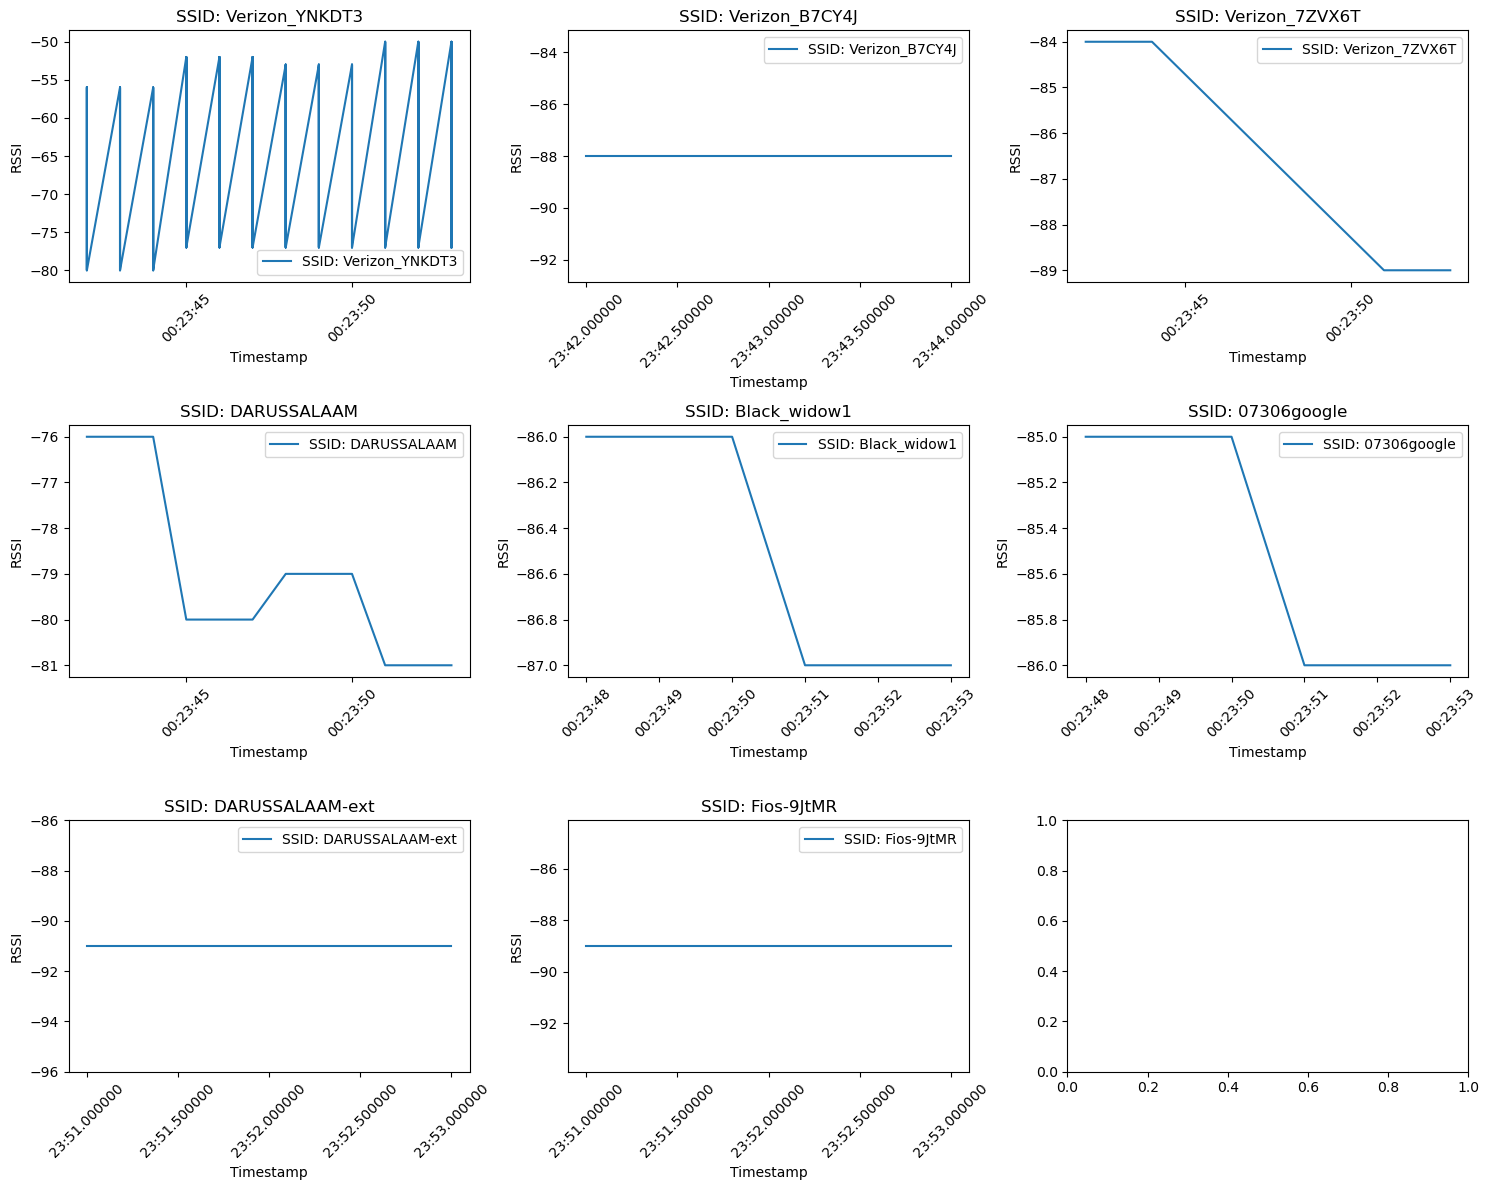

In [42]:
def plot_rssi_subplots(ssid_count):
    total_ssids = len(ssid_count)
    cols = 3  # Set number of columns in the grid
    rows = math.ceil(total_ssids / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
    axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array
    
    for i, (ssid, rssi_data) in enumerate(ssid_count.items()):
        timestamps = [dt.datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t, _ in rssi_data]
        rssi_values = [rssi for _, rssi in rssi_data]
        
        axes[i].plot(timestamps, rssi_values, label=f"SSID: {ssid}")
        axes[i].set_title(f"SSID: {ssid}")
        axes[i].set_xlabel('Timestamp')
        axes[i].set_ylabel('RSSI')
        axes[i].legend()
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_rssi_subplots(ssid_count)

### Signal Strength CDF

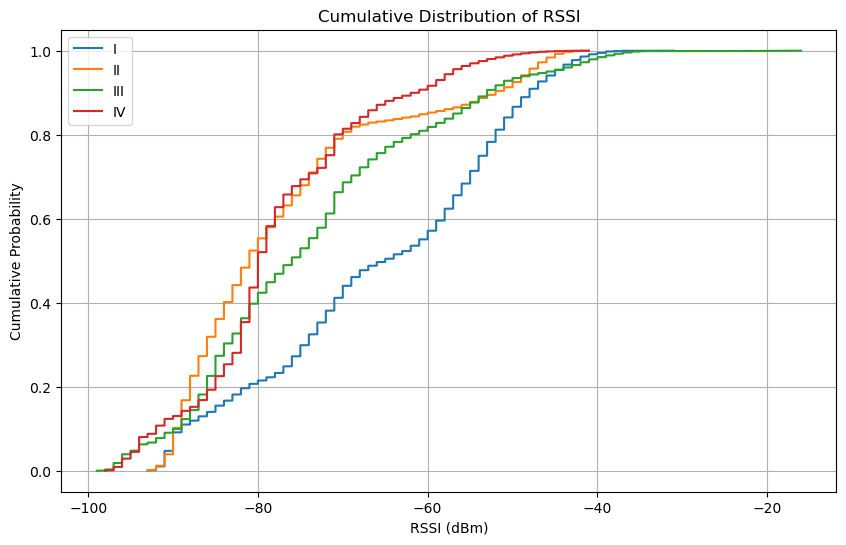

In [46]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize=(10, 6))
for location in df_loc['Location'].unique():
    subset = df_loc[df_loc['Location'] == location]
    ecdf = ECDF(subset['rssi'])
    plt.plot(ecdf.x, ecdf.y, label=location)

plt.title('Cumulative Distribution of RSSI')
plt.xlabel('RSSI (dBm)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()


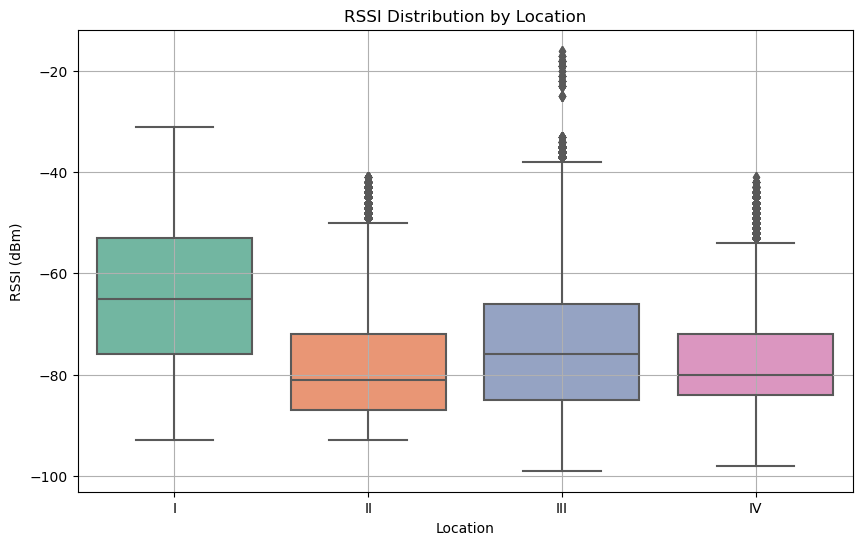

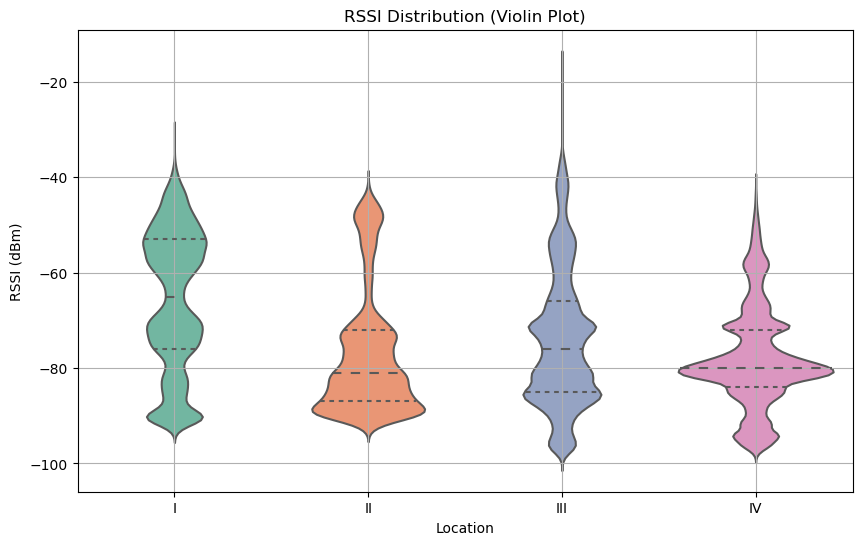

In [47]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='rssi', data=df_loc, palette='Set2')
plt.title('RSSI Distribution by Location')
plt.ylabel('RSSI (dBm)')
plt.xlabel('Location')
plt.grid(True)
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Location', y='rssi', data=df_loc, palette='Set2', inner='quartile')
plt.title('RSSI Distribution (Violin Plot)')
plt.ylabel('RSSI (dBm)')
plt.xlabel('Location')
plt.grid(True)
plt.show()

C:\Users\pinal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


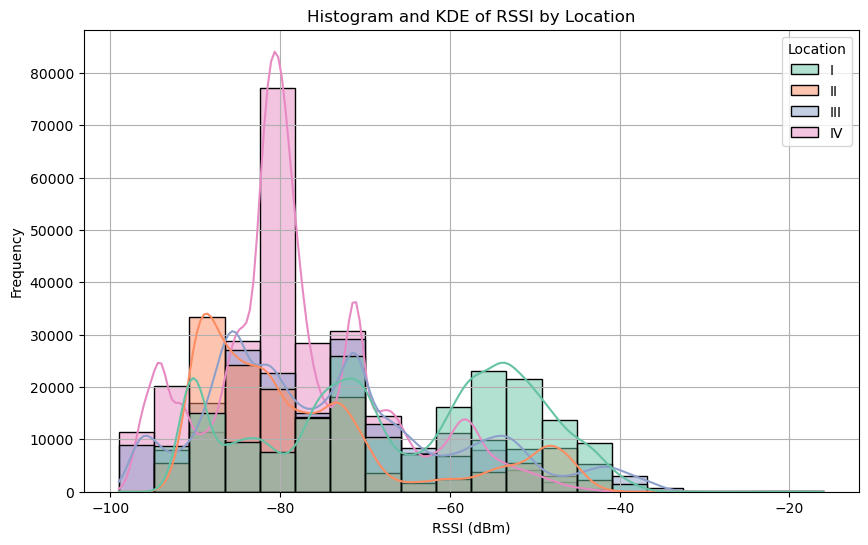

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_loc, x='rssi', hue='Location', kde=True, palette='Set2', bins=20)
plt.title('Histogram and KDE of RSSI by Location')
plt.xlabel('RSSI (dBm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\pinal\AppData\Local\Temp\ipykernel_30516\600793065.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Location', y='rssi', data=df_loc, jitter=True, palette='Set2', alpha=0.7)
C:\Users\pinal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pinal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


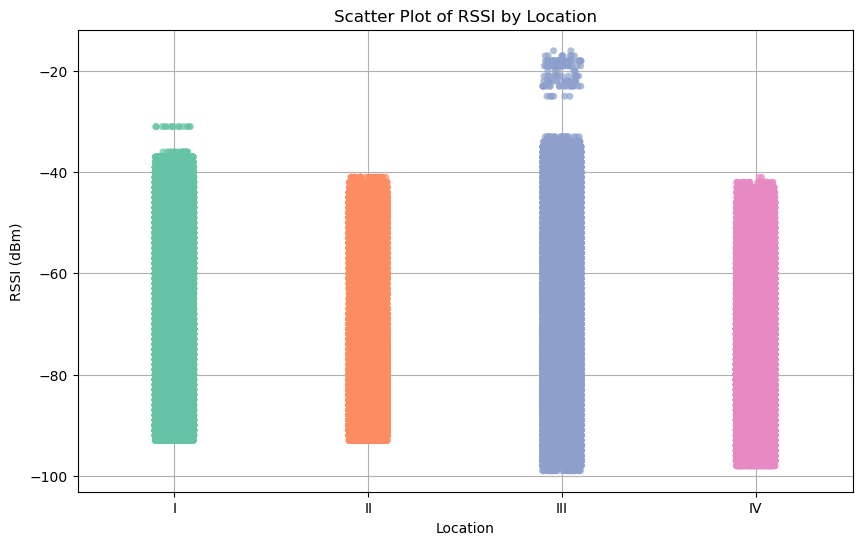

In [51]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Location', y='rssi', data=df_loc, jitter=True, palette='Set2', alpha=0.7)
plt.title('Scatter Plot of RSSI by Location')
plt.ylabel('RSSI (dBm)')
plt.xlabel('Location')
plt.grid(True)
plt.show()